In [1]:
import glob
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

D:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_sound_files(parent_dir, file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(parent_dir + fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,10), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(2,5,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.95,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,10), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(2,5,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.95,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,10), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(2,5,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.95,fontsize=18)
    plt.show()

In [3]:
sound_file_paths = ["aircon.wav", "carhorn.wav", "play.wav", "dogbark.wav", "drill.wav",
                   "engine.wav","gunshots.wav","jackhammer.wav","siren.wav","music.wav"]
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music"]

parent_dir = 'D://DataSets//ML_project//Samples//'

raw_sounds = load_sound_files(parent_dir, sound_file_paths)

I tried changing parameters for the mel bands and used 60 mel bands instead of 20 in the usual RNN as Music Classification uses 60 mel bands for feature extraction.

In [4]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size // 2)

def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 60, frames = 41):
    window_size = 512 * (frames - 1)
    mfccs = []
    labels = []
    for l, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            sound_clip,s = librosa.load(fn)
            label = fn.split('fold')[1].split('-')[1]
            for (start,end) in windows(sound_clip,window_size):
                if(len(sound_clip[start:end]) == window_size):
                    signal = sound_clip[start:end]
                    mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
                    mfccs.append(mfcc)
                    labels.append(label)         
    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features), np.array(labels,dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [28]:
# use this to process the audio files into numpy arrays
def save_folds(data_dir):
    for k in range(1,11):
        fold_name = 'fold' + str(k)
        print("\nSaving " + fold_name)
        features, labels = extract_features(parent_dir, [fold_name])
        labels = one_hot_encode(labels)
        
        print("Features of", fold_name , " = ", features.shape)
        print("Labels of", fold_name , " = ", labels.shape)
        
        feature_file = os.path.join(data_dir, fold_name + '_x.npy')
        labels_file = os.path.join(data_dir, fold_name + '_y.npy')
        np.save(feature_file, features)
        print("Saved " + feature_file)
        np.save(labels_file, labels)
        print("Saved " + labels_file)

def assure_path_exists(path):
    mydir = os.path.join(os.getcwd(), path)
    if not os.path.exists(mydir):
        os.makedirs(mydir)
        
# uncomment this to recreate and save the feature vectors
parent_dir = "D://MachineLearningProjects//Multilabel_Audio_Classification//UrbanSound8K//audio" # Where you have saved the UrbanSound8K data set"       
save_dir = "D://MachineLearningProjects//Multilabel_Audio_Classification//us8k-np-rnn_60_mel_bands"
assure_path_exists(save_dir)
save_folds(save_dir)


Saving fold1
Features of fold1  =  (5446, 60, 41)
Labels of fold1  =  (5446, 10)
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold1_x.npy
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold1_y.npy

Saving fold2
Features of fold2  =  (5388, 60, 41)
Labels of fold2  =  (5388, 10)
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold2_x.npy
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold2_y.npy

Saving fold3
Features of fold3  =  (5852, 60, 41)
Labels of fold3  =  (5852, 10)
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold3_x.npy
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold3_y.npy

Saving fold4
Features of fold4  =  (6048, 60, 41)
Labels of fold4  =  (6048, 10)
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold4_x.npy
Saved D://DataSets//ML_project//us8k-np-rnn_60_mel_bands\fold4_y.npy

Saving fold5
Features of fold5  =  (5689, 60, 41)
Labels of fold5  =  (5689, 10)
Saved D://DataSets//ML_project//us8k-n

In [5]:
# this is used to load the folds incrementally
def load_folds(folds):
    subsequent_fold = False
    for k in range(len(folds)):
        fold_name = 'fold' + str(folds[k])
        feature_file = os.path.join(data_dir, fold_name + '_x.npy')
        labels_file = os.path.join(data_dir, fold_name + '_y.npy')
        loaded_features = np.load(feature_file)
        loaded_labels = np.load(labels_file)
        print (fold_name, "features: ", loaded_features.shape)

        if subsequent_fold:
            features = np.concatenate((features, loaded_features))
            labels = np.concatenate((labels, loaded_labels))
        else:
            features = loaded_features
            labels = loaded_labels
            subsequent_fold = True
        
    return features, labels

In [6]:
data_dir = "D://MachineLearningProjects//Multilabel_Audio_Classification//us8k-np-rnn_60_mel_bands"

def extract_feature_array(filename, bands = 60, frames = 41):
    window_size = 512 * (frames - 1)
    mfccs = []
    sound_clip,s = librosa.load(filename)
    for (start,end) in windows(sound_clip,window_size):
        if(len(sound_clip[start:end]) == window_size):
            signal = sound_clip[start:end]
            mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
            mfccs.append(mfcc)
            
    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features)

sample_filename = "D://MachineLearningProjects//Multilabel_Audio_Classification//Samples//music.wav"
features = extract_feature_array(sample_filename)
data_points, _ = librosa.load(sample_filename)
print ("IN: Initial Data Points =", len(data_points))
print ("OUT: Total features =", np.shape(features))

IN: Initial Data Points = 88200
OUT: Total features = (7, 60, 41)


In [8]:
tf.set_random_seed(0)
np.random.seed(0)

def evaluate(model):
    y_prob = model.predict_proba(test_x, verbose=0)
    y_pred = y_prob.argmax(axis=-1)
    y_true = np.argmax(test_y, 1)

    roc = roc_auc_score(test_y, y_prob)
    print ("ROC:",  round(roc,3))

    # evaluate the model
    score, accuracy = model.evaluate(test_x, test_y, batch_size=32)
    print("\nAccuracy = {:.2f}".format(accuracy))

    # the F-score gives a similiar value to the accuracy score, but useful for cross-checking
    p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
    print ("F-Score:", round(f,2))
    
    return roc, accuracy

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

data_dim = 41
timesteps = 60
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()

# returns a sequence of vectors of dimension 256
model.add(LSTM(256, return_sequences=True, input_shape=(timesteps, data_dim)))  

model.add(Dropout(0.1))

# return a single vector of dimension 128
model.add(LSTM(128))  

model.add(Dropout(0.1))


# apply softmax to output
model.add(Dense(num_classes, activation='softmax'))


# compile the model for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# load fold1 for testing
train_x, train_y = load_folds([1,2,3,4,5,6])

# load fold2 for validation
valid_x, valid_y = load_folds([9])
    
# loading folds for testing
test_x, test_y = load_folds([10])

# a stopping function to stop training before we excessively overfit to the training set
earlystop = EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='auto')

model.fit(train_x, train_y, batch_size=128, nb_epoch=10, callbacks=[earlystop], validation_data=(valid_x, valid_y))

fold1 features:  (5446, 60, 41)
fold2 features:  (5388, 60, 41)
fold3 features:  (5852, 60, 41)
fold4 features:  (6048, 60, 41)
fold5 features:  (5689, 60, 41)
fold6 features:  (5080, 60, 41)
fold9 features:  (5118, 60, 41)
fold10 features:  (5218, 60, 41)


D:\Anaconda\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 33503 samples, validate on 5118 samples
Epoch 1/10
33503/33503 [==============================] - 182s 5ms/step - loss: 0.8295 - acc: 0.7205 - val_loss: 1.8951 - val_acc: 0.5645
Epoch 2/10
33503/33503 [==============================] - 181s 5ms/step - loss: 0.4174 - acc: 0.8563 - val_loss: 1.9414 - val_acc: 0.5494
Epoch 00002: early stopping


In [37]:
# now evaluate the trained model against the unseen test data
print("Evaluating model...")
roc, acc = evaluate(model)

Evaluating model...
ROC: 0.892
5218/5218 [==============================] - 12s 2ms/step

Accuracy = 0.54
F-Score: 0.54


In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

data_dim = 41
timesteps = 60
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()

# returns a sequence of vectors of dimension 256
model.add(LSTM(256, return_sequences=True, input_shape=(timesteps, data_dim)))  

model.add(Dropout(0.1))

# return a single vector of dimension 128
model.add(LSTM(128))  

model.add(Dropout(0.1))


# apply softmax to output
model.add(Dense(num_classes, activation='softmax'))


# compile the model for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# load fold1 for testing
train_x, train_y = load_folds([1,2,3,4,5,6])

# load fold2 for validation
valid_x, valid_y = load_folds([9])
    
# loading folds for testing
test_x, test_y = load_folds([10])

# a stopping function to stop training before we excessively overfit to the training set
earlystop = EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='auto')

model.fit(train_x, train_y, batch_size=128, nb_epoch=10, callbacks=[earlystop], validation_data=(valid_x, valid_y))

fold1 features:  (5446, 60, 41)
fold2 features:  (5388, 60, 41)
fold3 features:  (5852, 60, 41)
fold4 features:  (6048, 60, 41)
fold5 features:  (5689, 60, 41)
fold6 features:  (5080, 60, 41)
fold9 features:  (5118, 60, 41)
fold10 features:  (5218, 60, 41)


D:\Anaconda\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 33503 samples, validate on 5118 samples
Epoch 1/10
33503/33503 [==============================] - 210s 6ms/step - loss: 0.7840 - acc: 0.7387 - val_loss: 2.1272 - val_acc: 0.5018
Epoch 2/10
33503/33503 [==============================] - 195s 6ms/step - loss: 0.3858 - acc: 0.8715 - val_loss: 2.2428 - val_acc: 0.5318
Epoch 00002: early stopping


In [44]:
# now evaluate the trained model against the unseen test data
print("Evaluating model...")
roc, acc = evaluate(model)

Evaluating model...
ROC: 0.901
5218/5218 [==============================] - 12s 2ms/step

Accuracy = 0.53
F-Score: 0.53


Showing Confusion Matrix


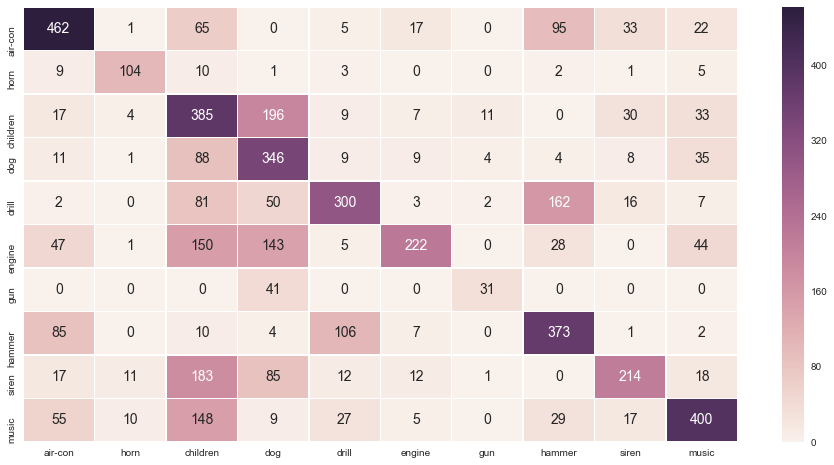

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

labels = ["air-con","horn","children","dog","drill","engine","gun","hammer","siren","music"]
print ("Showing Confusion Matrix")
y_prob = model.predict_proba(test_x, verbose=0)
y_pred = y_prob.argmax(axis=-1)
y_true = np.argmax(test_y, 1)
cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize = (16,8))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g', linewidths=.5, )

In [42]:
sound_file_paths = ["aircon.wav", "carhorn.wav", "play.wav", "dogbark.wav", "drill.wav",
                    "engine.wav","gunshots.wav","jackhammer.wav","siren.wav","music.wav"]
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music"]
parent_dir = 'D://DataSets//ML_project//Samples//'


# create predictions for each of the sound classes
for s in range(len(sound_names)):

    print ("\n----- ", sound_names[s], "-----")
    # load audio file and extract features
    predict_file = parent_dir + sound_file_paths[s]
    predict_x = extract_feature_array(predict_file)
    
    # generate prediction, passing in just a single row of features
    predictions = model.predict(predict_x)
    
    if len(predictions) == 0: 
        print ("No prediction")
        continue
    
    #for i in range(len(predictions[0])):
    #    print sound_names[i], "=", round(predictions[0,i] * 100, 1)
    
    # get the indices of the top 2 predictions, invert into descending order
    ind = np.argpartition(predictions[0], -2)[-2:]
    ind[np.argsort(predictions[0][ind])]
    ind = ind[::-1]
    
    print ("Top guess: ", sound_names[ind[0]], " (",round(predictions[0,ind[0]],3),")")
    print ("2nd guess: ", sound_names[ind[1]], " (",round(predictions[0,ind[1]],3),")")


-----  air conditioner -----
Top guess:  air conditioner  ( 0.995 )
2nd guess:  street music  ( 0.002 )

-----  car horn -----
Top guess:  car horn  ( 0.967 )
2nd guess:  street music  ( 0.021 )

-----  children playing -----
Top guess:  children playing  ( 0.529 )
2nd guess:  dog bark  ( 0.208 )

-----  dog bark -----
Top guess:  dog bark  ( 0.991 )
2nd guess:  gun shot  ( 0.004 )

-----  drilling -----
Top guess:  drilling  ( 0.989 )
2nd guess:  jackhammer  ( 0.008 )

-----  engine idling -----
Top guess:  engine idling  ( 0.99 )
2nd guess:  jackhammer  ( 0.004 )

-----  gun shot -----
Top guess:  gun shot  ( 0.606 )
2nd guess:  air conditioner  ( 0.172 )

-----  jackhammer -----
Top guess:  jackhammer  ( 0.99 )
2nd guess:  air conditioner  ( 0.006 )

-----  siren -----
Top guess:  siren  ( 0.935 )
2nd guess:  children playing  ( 0.049 )

-----  street music -----
Top guess:  street music  ( 0.684 )
2nd guess:  jackhammer  ( 0.146 )
